<a href="https://colab.research.google.com/github/NajmehMa/HW2--datamining/blob/main/CSE243_Datamining_PA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.preprocessing as prepr
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, silhouette_score


In [145]:





from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/My Drive/Customer_Churn.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   COLLEGE                      20000 non-null  object
 1   INCOME                       20000 non-null  int64 
 2   OVERAGE                      20000 non-null  int64 
 3   LEFTOVER                     20000 non-null  int64 
 4   HOUSE                        20000 non-null  int64 
 5   HANDSET_PRICE                20000 non-null  int64 
 6   OVER_15MINS_CALLS_PER_MONTH  20000 non-null  int64 
 7   AVERAGE_CALL_DURATION        20000 non-null  int64 
 8   REPORTED_SATISFACTION        20000 non-null  object
 9   REPORTED_USAGE_LEVEL         20000 non-null  object
 10  CONSIDERING_CHANGE_OF_PLAN   20000 non-null  object
 11  LEAVE                        20000 non-null  object
dtypes: int64(7), object(5)
memory usage: 1.8+ MB


In [147]:
# Checking missing / NULL values

df.isnull().any()

COLLEGE                        False
INCOME                         False
OVERAGE                        False
LEFTOVER                       False
HOUSE                          False
HANDSET_PRICE                  False
OVER_15MINS_CALLS_PER_MONTH    False
AVERAGE_CALL_DURATION          False
REPORTED_SATISFACTION          False
REPORTED_USAGE_LEVEL           False
CONSIDERING_CHANGE_OF_PLAN     False
LEAVE                          False
dtype: bool

In [148]:
# Duplicate value check

df.duplicated().any()

False

In [149]:
def barplot_percentages(f, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = df.groupby(f)["LEAVE"].value_counts().to_frame()
    g = g.rename({"LEAVE": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=f, y= axis_name, hue='LEAVE', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=f, hue='LEAVE', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()



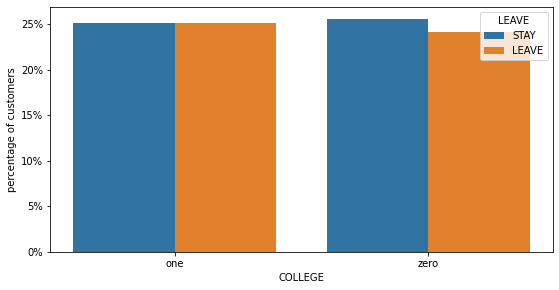

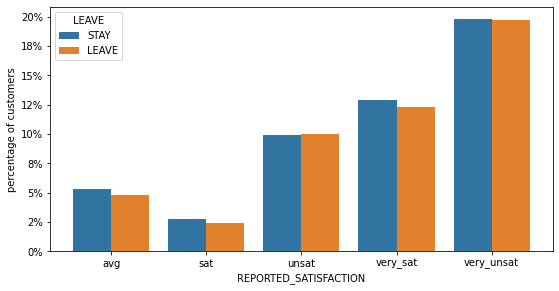

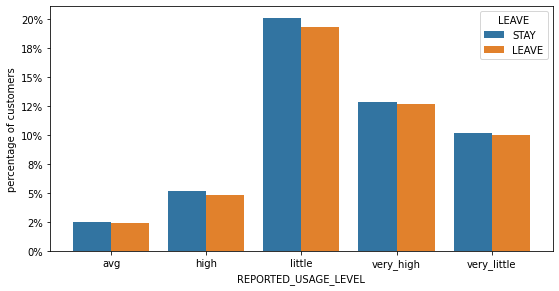

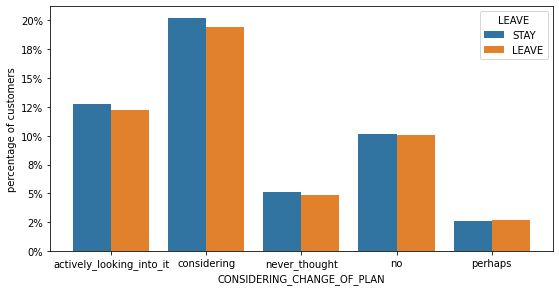

In [150]:
plt.figure(figsize=(9, 4.5))
barplot_percentages('COLLEGE')
plt.figure(figsize=(9, 4.5))
barplot_percentages('REPORTED_SATISFACTION')
plt.figure(figsize=(9, 4.5))
barplot_percentages('REPORTED_USAGE_LEVEL')
plt.figure(figsize=(9, 4.5))
barplot_percentages('CONSIDERING_CHANGE_OF_PLAN')

In [151]:
def kdeplot(f):
    plt.figure(figsize=(9, 4))
    plt.title("Original {} Distibution".format(f))
    ax = sns.kdeplot(df[f], color= 'green')
    plt.figure(figsize=(9, 4))
    plt.title("{} Distibution: LEAVE vs STAY".format(f))
    ax0 = sns.kdeplot(df[df['LEAVE'] == "LEAVE"][f], color= 'orange', label='LEAVE')
    ax1 = sns.kdeplot(df[df['LEAVE'] == 'STAY'][f], color= 'blue', label='STAY')

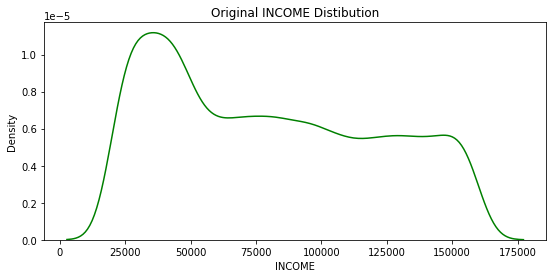

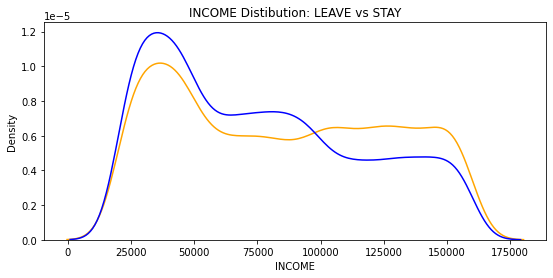

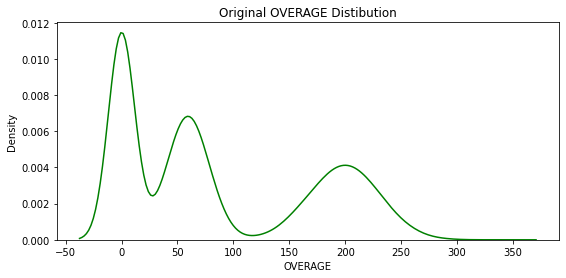

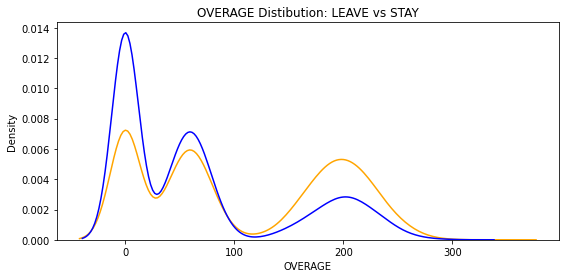

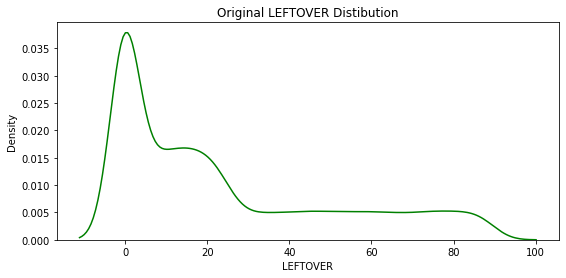

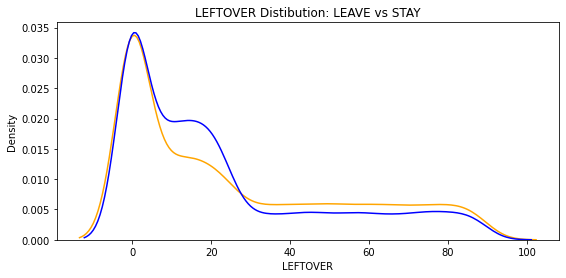

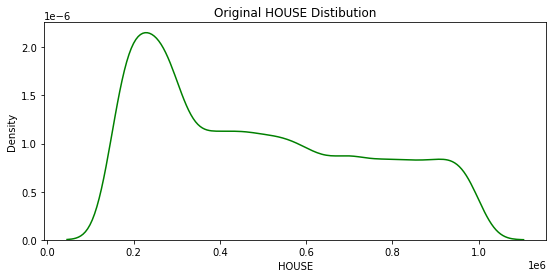

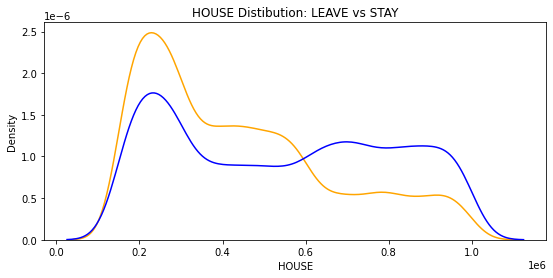

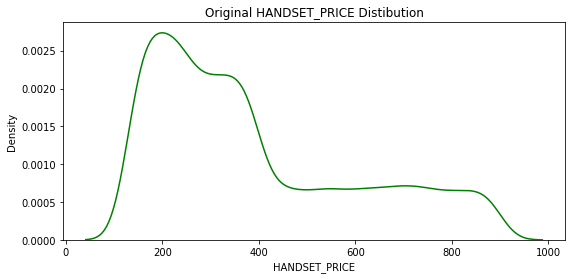

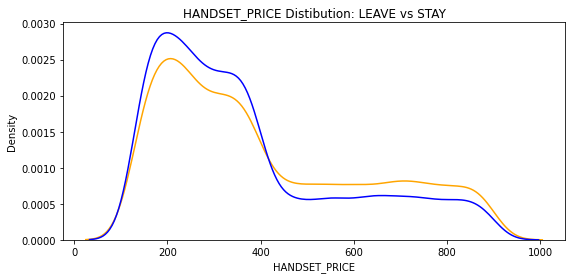

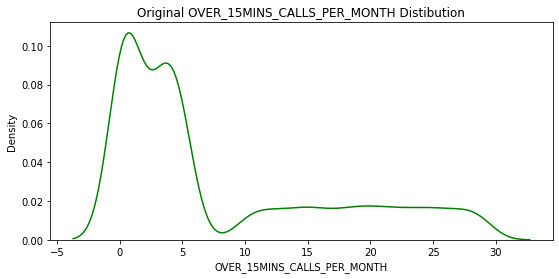

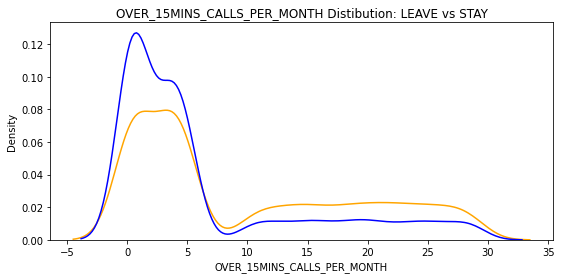

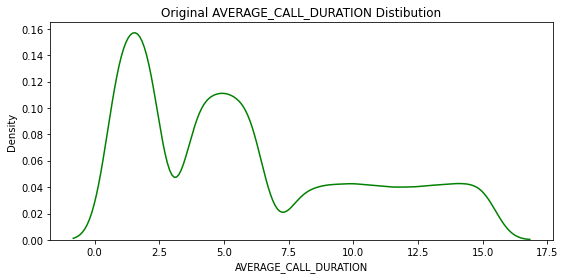

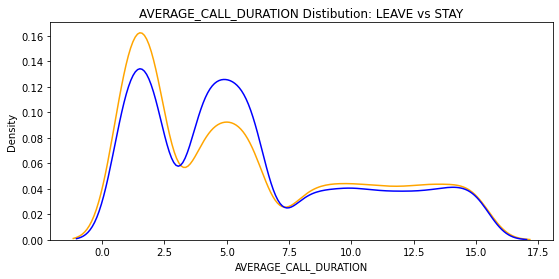

In [152]:
kdeplot('INCOME')
kdeplot('OVERAGE')
kdeplot('LEFTOVER')
kdeplot('HOUSE')
kdeplot('HANDSET_PRICE')
kdeplot('OVER_15MINS_CALLS_PER_MONTH')
kdeplot('AVERAGE_CALL_DURATION')

In [153]:
def Generate_bar_graph(x, y, x_title, y_title, chart_title):   
    """ Based on x and y value, generate bar graph """
    
    fig, ax = plt.subplots()
    ax.bar(range(len(x))
       , y
       , width = 0.75
       , color=['b','r','g','k']
        , alpha = 0.6) 

    # stopping alphabetical sorting of graph
    plt.xticks(range(len(x)),x)
    plt.title(chart_title, fontsize=14)
    plt.xlabel(x_title,fontsize=13)
    plt.ylabel(y_title,fontsize=13)
    plt.grid(b=False)
    plt.yticks(fontsize=0)
    plt.ylim(top=1)

    
    # Visible x - axis line
    for spine in plt.gca().spines.values():
        spine.set_visible(False) if spine.spine_type != 'bottom' else spine.set_visible(True)
    
    # Display label for each plot
    for i,v in (enumerate(y)):
        ax.text(i
                ,v+0.05
                ,str(round((v*100),2))+'%'
                ,fontsize=13
                ,ha='center')
    
    plt.show()

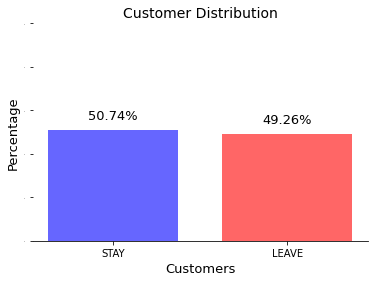

STAY     0.5074
LEAVE    0.4926
Name: LEAVE, dtype: float64


In [154]:
#calculate churn rate
Churn_rate = df['LEAVE'].value_counts() / df.shape[0]
Generate_bar_graph(Churn_rate.index
                   , Churn_rate.values
                   , 'Customers'
                   , 'Percentage'
                   , 'Customer Distribution')

print(Churn_rate)

In [155]:
# map the categorial features to a number
collage = {'zero':0,'one':1}
satisfaction ={'very_unsat':0,'unsat':1,'avg':2,'sat':3,'very_sat':4}
usage = {'very_little':0,'little':1,'avg':2,'high':3,'very_high':4}
change_plan = {'never_thought':0,'no':1,'perhaps':2,'considering':3,'actively_looking_into_it':4}
leave = {'LEAVE':1,'STAY':0}
#replace the ordinal values with numerical values 
df["COLLEGE"].replace(collage,inplace=True)    
df["REPORTED_SATISFACTION"].replace(satisfaction,inplace= True)
df["REPORTED_USAGE_LEVEL"].replace(usage, inplace=True)    
df["LEAVE"].replace(leave,inplace=True)
df["CONSIDERING_CHANGE_OF_PLAN"].replace(change_plan,inplace=True)

In [156]:
df.describe()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.502400,80281.447750,85.979550,23.898650,493155.264250,389.615100,8.000700,6.002250,1.566100,1.815050,2.494000,0.492600
std,0.500007,41680.586319,85.992324,26.816645,252407.884692,213.820682,8.925418,4.402558,1.629437,1.511839,1.323538,0.499958
min,0.000000,20007.000000,-2.000000,0.000000,150002.000000,130.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,42217.000000,0.000000,0.000000,263714.250000,219.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,75366.500000,59.000000,14.000000,452259.500000,326.000000,4.000000,5.000000,1.000000,1.000000,3.000000,0.000000
75%,1.000000,115881.750000,179.000000,41.000000,702378.000000,533.250000,15.000000,10.000000,4.000000,4.000000,3.000000,1.000000
max,1.000000,159983.000000,335.000000,89.000000,999996.000000,899.000000,29.000000,15.000000,4.000000,4.000000,4.000000,1.000000


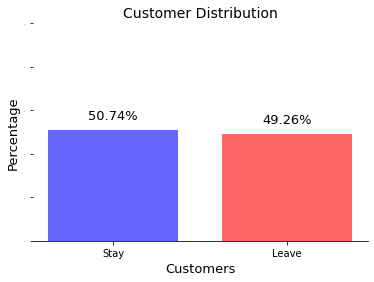

0    0.5074
1    0.4926
Name: LEAVE, dtype: float64


In [157]:
#calculate churn rate
Churn_rate = df['LEAVE'].value_counts() / df.shape[0]
Generate_bar_graph(Churn_rate.index.map({0:"Stay",1:'Leave'})
                   , Churn_rate.values
                   , 'Customers'
                   , 'Percentage'
                   , 'Customer Distribution')

print(Churn_rate)

In [158]:
churn_summary = df.groupby('LEAVE')
churn_rate=churn_summary.size()/len(df)
churn_rate

LEAVE
0    0.5074
1    0.4926
dtype: float64

In [159]:
round(churn_summary.mean(),2)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN
LEAVE,,,,,,,,,,,
0,0.50,76325.86,66.06,22.30,545682.40,370.82,6.22,6.04,1.59,1.81,2.50
1,0.51,84355.88,106.50,25.55,439049.97,408.98,9.83,5.96,1.55,1.82,2.49


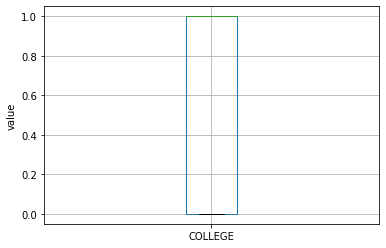

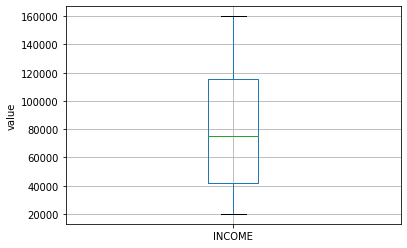

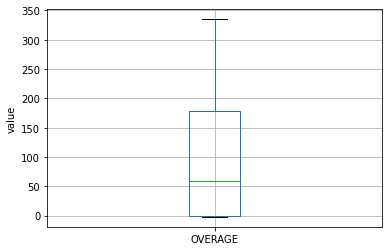

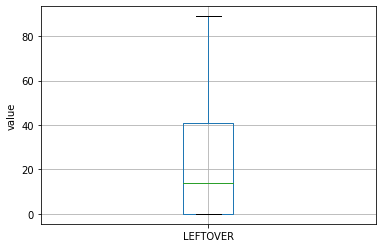

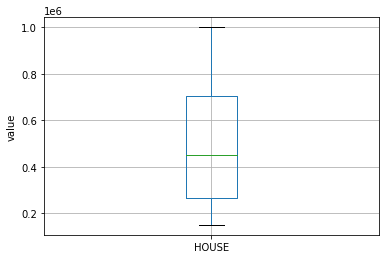

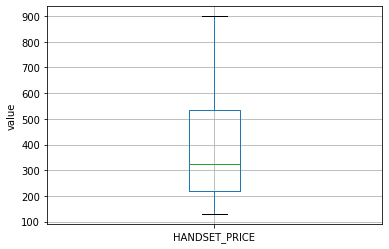

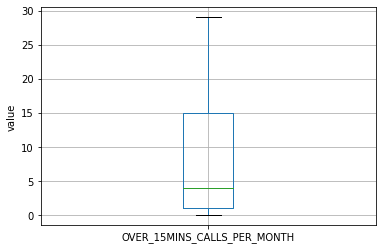

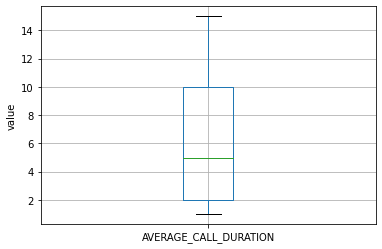

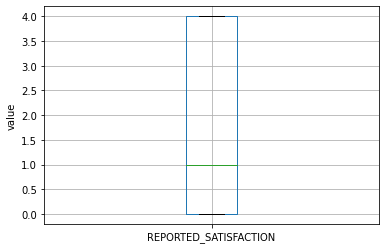

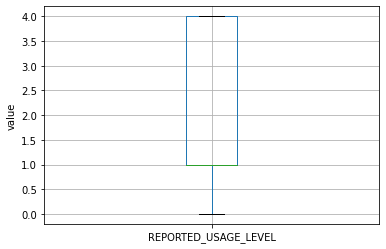

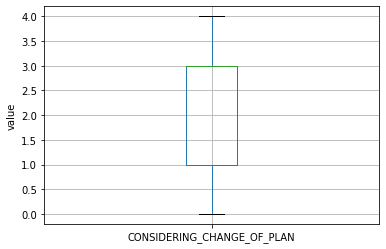

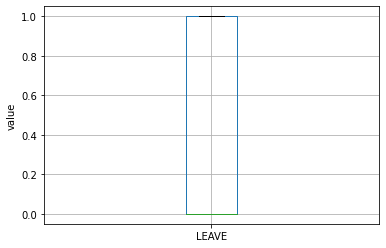

In [160]:
#plot boxplot to see if any of the features have outlies or not
for coloumn in df:
    plt.figure()
    fig= df.boxplot([coloumn])
    fig.axes.set_ylabel("value")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

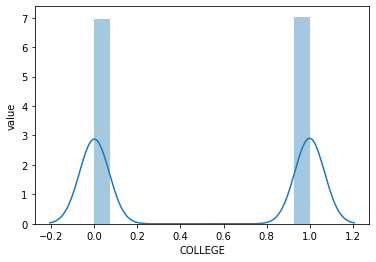

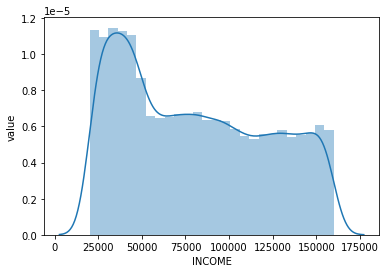

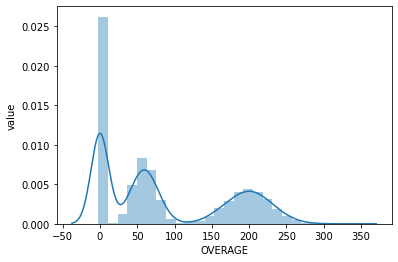

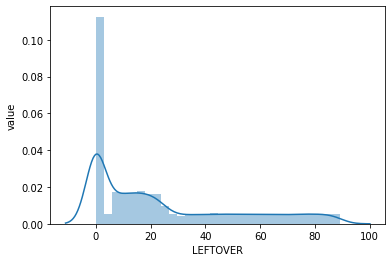

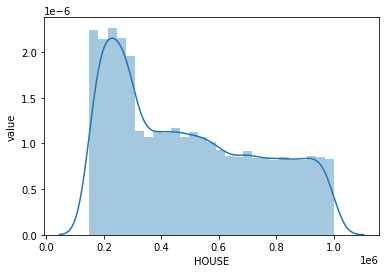

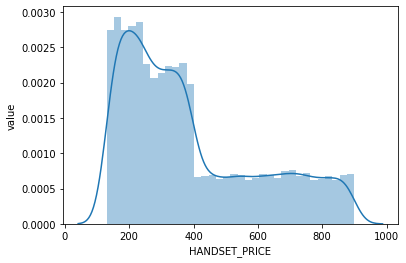

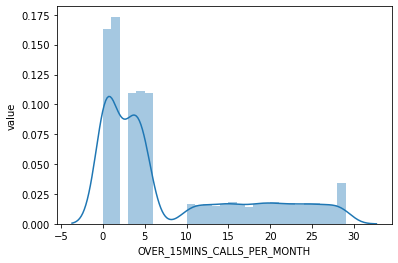

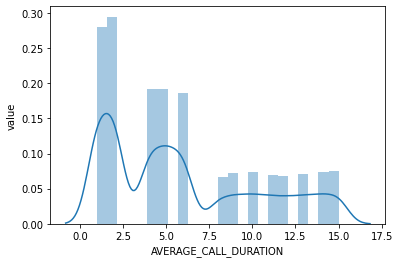

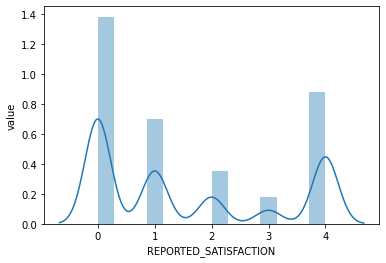

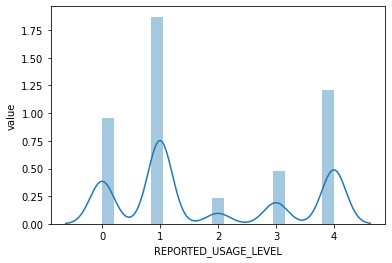

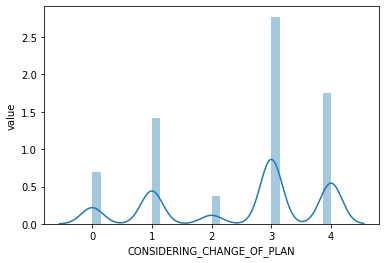

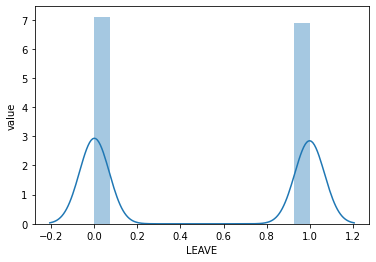

In [161]:
# plot features' distibutions

for coloumn in df:
    plt.figure()
    fig= sns.distplot(df[coloumn]) 
    fig.axes.set_ylabel("value")


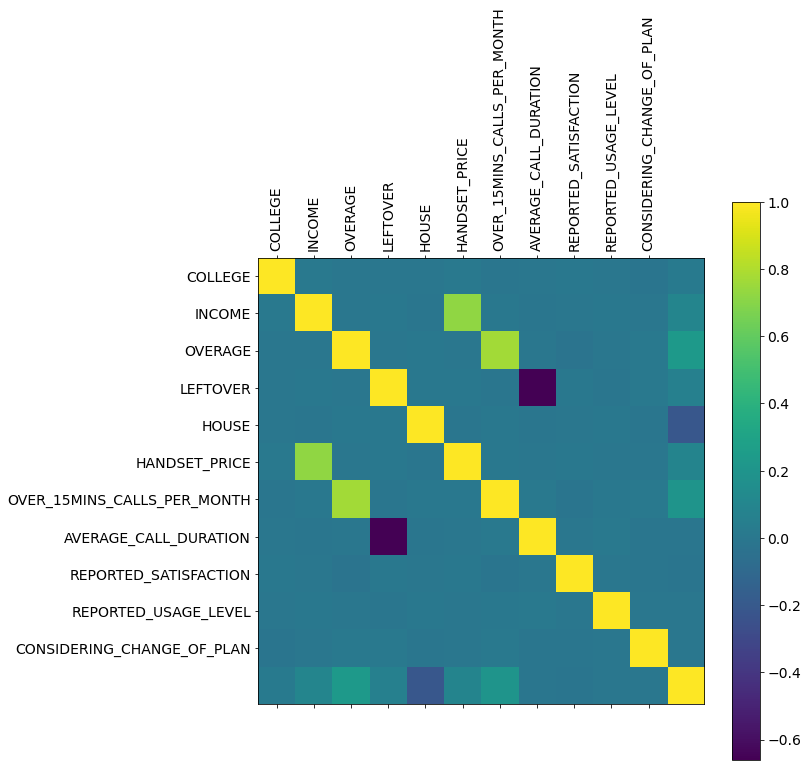

In [162]:
#plot dataframe correlation matrix
f = plt.figure(figsize=(10, 10  ))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]-1), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]-1), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
#plt.title('Correlation Matrix', fontsize=20);  


In [163]:
df.corr()


,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
COLLEGE,1.000000,0.011122,-0.003091,-0.003925,-0.000217,0.009950,-0.007205,-0.001490,0.003058,-0.000240,-0.011841,0.014673
INCOME,0.011122,1.000000,0.000458,0.006515,-0.010964,0.727200,0.002136,-0.007219,-0.002459,0.001459,-0.002229,0.096320
OVERAGE,-0.003091,0.000458,1.000000,-0.003123,0.002412,0.000324,0.770557,0.000653,-0.019057,-0.000568,0.014073,0.235139
LEFTOVER,-0.003925,0.006515,-0.003123,1.000000,0.006530,0.004004,-0.010411,-0.660285,0.001841,-0.007729,0.013660,0.060540
HOUSE,-0.000217,-0.010964,0.002412,0.006530,1.000000,-0.007756,0.007410,-0.009359,-0.004691,0.005587,-0.008021,-0.211213
HANDSET_PRICE,0.009950,0.727200,0.000324,0.004004,-0.007756,1.000000,0.002680,-0.005190,0.002047,-0.003443,-0.003294,0.089221
OVER_15MINS_CALLS_PER_MONTH,-0.007205,0.002136,0.770557,-0.010411,0.007410,0.002680,1.000000,0.007769,-0.013917,0.001433,0.011653,0.202193
AVERAGE_CALL_DURATION,-0.001490,-0.007219,0.000653,-0.660285,-0.009359,-0.005190,0.007769,1.000000,-0.002380,0.009701,-0.008600,-0.008704
REPORTED_SATISFACTION,0.003058,-0.002459,-0.019057,0.001841,-0.004691,0.002047,-0.013917,-0.002380,1.000000,0.000386,-0.008511,-0.012105
REPORTED_USAGE_LEVEL,-0.000240,0.001459,-0.000568,-0.007729,0.005587,-0.003443,0.001433,0.009701,0.000386,1.000000,-0.004340,0.001199


In [164]:
#corrolation matrix using seaborn.heatmap
def Generate_heatmap_graph(corr, chart_title, mask_uppertri=False ):
    """ Based on features , generate correlation matrix """
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = mask_uppertri

    fig,ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 10.5, 'weight' : 'bold'}
                , cmap=plt.get_cmap("YlOrBr")
                , linewidths=.1)
    plt.title(chart_title, fontsize=14)
    plt.show()

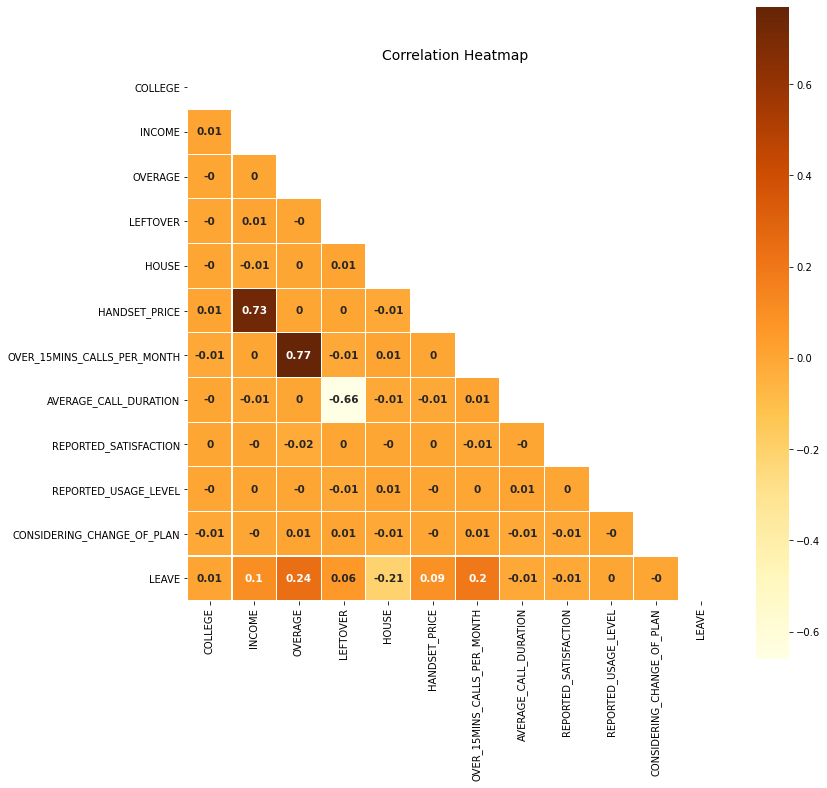

In [165]:
var_corr = round(df.corr(),2)
Generate_heatmap_graph(var_corr
                       ,chart_title = 'Correlation Heatmap'
                       ,mask_uppertri = True)

In [166]:
# standardizing features
def Standardize_feature(feature):
    """ Return normalized features """
    return prepr.StandardScaler().fit_transform(feature)

In [167]:
#df['INCOME'] = Standardize_feature(df[['INCOME']])
#df['OVERAGE'] = Standardize_feature(df[['OVERAGE']])
#df['LEFTOVER'] = Standardize_feature(df[['LEFTOVER']])
#df['HOUSE'] = Standardize_feature(df[['HOUSE']])
#df['HANDSET_PRICE'] = Standardize_feature(df[['HANDSET_PRICE']])
#df['OVER_15MINS_CALLS_PER_MONTH'] = Standardize_feature(df[['OVER_15MINS_CALLS_PER_MONTH']])
#df['AVERAGE_CALL_DURATION'] = Standardize_feature(df[['AVERAGE_CALL_DURATION']])


In [168]:
# MIN-MAX normalizing features
def Normalize_feature(feature):
    """ Return normalized features """
    return prepr.MinMaxScaler().fit_transform(feature)

In [169]:
df['INCOME'] = Normalize_feature(df[['INCOME']])
df['OVERAGE'] = Normalize_feature(df[['OVERAGE']])
df['LEFTOVER'] = Normalize_feature(df[['LEFTOVER']])
df['HOUSE'] = Normalize_feature(df[['HOUSE']])
df['HANDSET_PRICE'] = Normalize_feature(df[['HANDSET_PRICE']])
df['OVER_15MINS_CALLS_PER_MONTH'] = Normalize_feature(df[['OVER_15MINS_CALLS_PER_MONTH']])
df['AVERAGE_CALL_DURATION'] = Normalize_feature(df[['AVERAGE_CALL_DURATION']])
df['REPORTED_SATISFACTION'] = Normalize_feature(df[['REPORTED_SATISFACTION']])
df['REPORTED_USAGE_LEVEL'] = Normalize_feature(df[['REPORTED_USAGE_LEVEL']])
df['CONSIDERING_CHANGE_OF_PLAN'] = Normalize_feature(df[['CONSIDERING_CHANGE_OF_PLAN']])



In [170]:
df.describe()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.502400,0.430606,0.261067,0.268524,0.403713,0.337601,0.275886,0.357304,0.391525,0.453763,0.623500,0.492600
std,0.500007,0.297770,0.255170,0.301311,0.296953,0.278050,0.307773,0.314468,0.407359,0.377960,0.330884,0.499958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.158670,0.005935,0.000000,0.133780,0.115735,0.034483,0.071429,0.000000,0.250000,0.250000,0.000000
50%,1.000000,0.395493,0.181009,0.157303,0.355600,0.254876,0.137931,0.285714,0.250000,0.250000,0.750000,0.000000
75%,1.000000,0.684937,0.537092,0.460674,0.649859,0.524382,0.517241,0.642857,1.000000,1.000000,0.750000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [171]:
df1= df.copy()
df = df.drop(columns=['OVER_15MINS_CALLS_PER_MONTH'])
df = df.drop(columns=['INCOME'])
df= df.drop(columns=['AVERAGE_CALL_DURATION'])

In [172]:
df.shape

(20000, 9)

In [173]:
X,y = df.loc[:, df.columns != 'LEAVE'], df.loc[:, df.columns == 'LEAVE']

In [174]:
#elbow curve
def create_elbow_curve(data):
    """ Display elbow curve for K-means algo for given data """
   
    k = range(2,10)
    kmeans = [KMeans(n_clusters=i, init='k-means++', max_iter= 300, n_init= 10, random_state= 1 ) for i in k]

    score = [kmeans[i].fit(data).score(data)  for i in range(len(kmeans))]
    WSS= [kmeans[i].fit(data).inertia_ for i in range(len(kmeans))]
    silhouette= [silhouette_score(data, kmeans[i].fit(data).labels_) for i in range(len(kmeans))]                                    
                                      

    plt.figure(figsize=(10,6))
    plt.plot(k,score)   
    plt.xlabel("Clusters")
    plt.ylabel("Score")
    plt.title("Elbow curve",fontsize=15)
    plt.show()

    plt.figure(figsize=(10,6))  
    plt.xlabel("Clusters")
    plt.ylabel("WSS")
    plt.title("Elbow curve",fontsize=15)
    plt.plot(k,WSS)
    plt.show()

    plt.figure(figsize=(10,6))  
    plt.xlabel("Clusters")
    plt.ylabel("Average silhouette score")
    plt.title("Average silhouette score vesus number of clusters",fontsize=15)
    plt.plot(k,silhouette)
    plt.show()


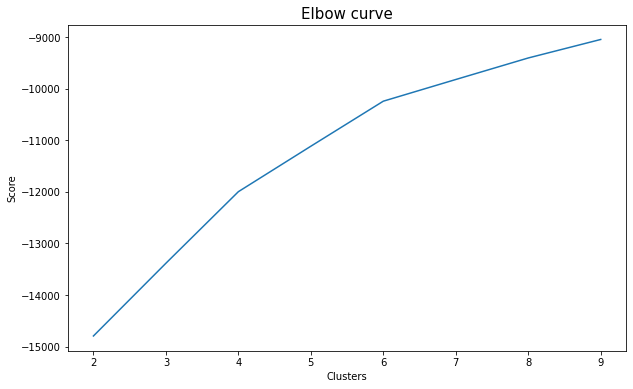

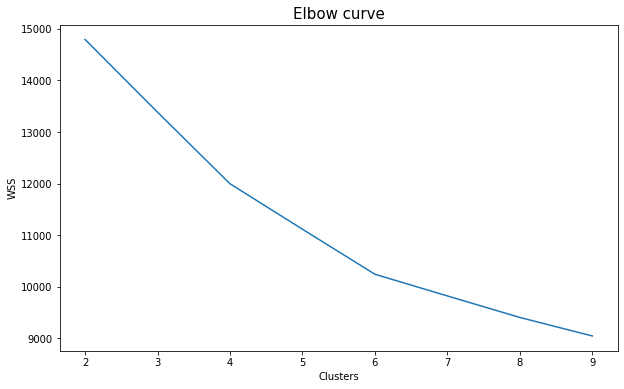

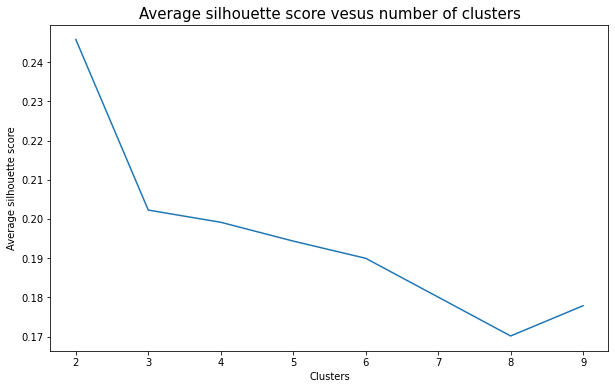

In [175]:
create_elbow_curve(X)

In [176]:
X.shape

(20000, 8)

In [177]:
# Applying k-means to the dataset
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter= 300, n_init= 10, random_state= 0 ).fit(X)
#y_kmeans=kmeans.fit_predict(X)


In [178]:
#y_kmeans.shape

In [179]:
kmeans.cluster_centers_


array([[-8.88178420e-15,  2.61859299e-01,  2.69712598e-01,
         4.03777216e-01,  3.34821055e-01,  3.90273312e-01,
         4.53853497e-01,  6.27436696e-01],
       [ 1.00000000e+00,  2.62526861e-01,  2.65215249e-01,
         4.07704979e-01,  3.42224166e-01,  1.23615536e-01,
         4.23987255e-01,  6.23956911e-01],
       [ 1.00000000e+00,  2.56002314e-01,  2.71411531e-01,
         3.95914688e-01,  3.36789003e-01,  9.05915534e-01,
         5.10269019e-01,  6.11295921e-01]])

In [180]:
label = kmeans.labels_
label

array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

In [181]:
kmeans.cluster_centers_.shape

(3, 8)

In [182]:
X[label ==0]

,COLLEGE,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN
0,0,0.005935,0.067416,0.192208,0.040312,0.25,0.25,0.25
3,0,0.118694,0.370787,0.750868,0.845254,0.25,1.00,0.75
5,0,0.195846,0.539326,0.568200,0.644993,0.25,0.75,0.25
6,0,0.670623,0.000000,0.644648,0.079324,0.00,0.25,1.00
8,0,0.005935,0.078652,0.146138,0.078023,1.00,0.25,1.00
...,...,...,...,...,...,...,...,...
19994,0,0.222552,0.078652,0.291501,0.897269,0.50,0.25,0.75
19995,0,0.005935,0.258427,0.256944,0.607282,1.00,0.25,1.00
19997,0,0.005935,0.741573,0.026573,0.188557,0.25,1.00,0.75
19998,0,0.145401,0.460674,0.496949,0.205462,0.00,0.25,0.75


In [183]:
X[label ==1]

,COLLEGE,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN
1,1,0.005935,0.146067,0.765398,0.148244,0.25,0.25,0.75
2,1,0.688427,0.000000,0.182410,0.092328,0.25,0.00,0.50
4,1,0.623145,0.955056,0.087979,0.144343,0.00,0.25,0.00
7,1,0.005935,0.224719,0.633059,0.295189,0.00,0.25,0.75
11,1,0.231454,0.146067,0.514362,0.267880,0.50,0.25,0.75
...,...,...,...,...,...,...,...,...
19983,1,0.005935,0.000000,0.140127,0.291287,0.00,0.25,0.75
19984,1,0.602374,0.516854,0.321091,0.312094,0.00,0.00,1.00
19986,1,0.005935,0.000000,0.100624,0.223667,0.25,0.00,1.00
19988,1,0.133531,0.898876,0.923174,0.699610,0.00,0.25,0.75


In [184]:
X[label ==2]

,COLLEGE,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN
14,1,0.774481,0.000000,0.975655,0.137841,1.00,1.00,0.75
21,1,0.237389,0.168539,0.001000,0.215865,1.00,1.00,0.00
22,1,0.750742,0.157303,0.084061,0.313394,1.00,0.00,1.00
24,1,0.151335,0.842697,0.156099,0.076723,1.00,0.00,0.50
25,1,0.005935,0.000000,0.421028,0.089727,0.50,1.00,1.00
...,...,...,...,...,...,...,...,...
19970,1,0.611276,0.269663,0.618758,0.496749,1.00,1.00,0.75
19975,1,0.614243,0.056180,0.034284,0.934980,0.75,0.75,0.25
19978,1,0.183976,0.280899,0.473599,0.332900,1.00,0.00,1.00
19987,1,0.005935,0.932584,0.018619,0.165150,1.00,0.25,0.00


In [185]:

cluster0_mean = X[label==0].mean()
cluster1_mean = X[label==1].mean()
cluster2_mean = X[label==2].mean()
print(cluster0_mean)
print(cluster1_mean)
print(cluster2_mean)


COLLEGE                       0.000000
OVERAGE                       0.261859
LEFTOVER                      0.269713
HOUSE                         0.403777
HANDSET_PRICE                 0.334821
REPORTED_SATISFACTION         0.390273
REPORTED_USAGE_LEVEL          0.453853
CONSIDERING_CHANGE_OF_PLAN    0.627437
dtype: float64
COLLEGE                       1.000000
OVERAGE                       0.262527
LEFTOVER                      0.265215
HOUSE                         0.407705
HANDSET_PRICE                 0.342224
REPORTED_SATISFACTION         0.123616
REPORTED_USAGE_LEVEL          0.423987
CONSIDERING_CHANGE_OF_PLAN    0.623957
dtype: float64
COLLEGE                       1.000000
OVERAGE                       0.256002
LEFTOVER                      0.271412
HOUSE                         0.395915
HANDSET_PRICE                 0.336789
REPORTED_SATISFACTION         0.905916
REPORTED_USAGE_LEVEL          0.510269
CONSIDERING_CHANGE_OF_PLAN    0.611296
dtype: float64


In [186]:
clusters_mean=pd.concat([cluster0_mean,cluster1_mean,cluster2_mean],axis=1)

,0,1
COLLEGE,0.000000,1.000000
OVERAGE,0.261859,0.260282
LEFTOVER,0.269713,0.267347
HOUSE,0.403777,0.403649
HANDSET_PRICE,0.334821,0.340354
REPORTED_SATISFACTION,0.390273,0.392765
REPORTED_USAGE_LEVEL,0.453853,0.453672
CONSIDERING_CHANGE_OF_PLAN,0.627437,0.619601


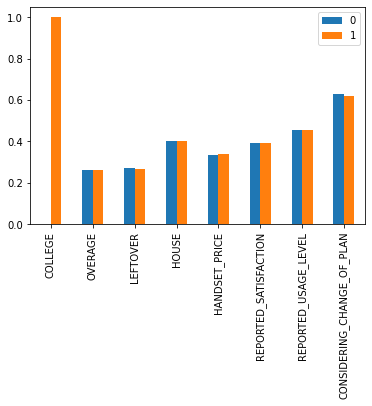

In [190]:
kmeans2=KMeans(n_clusters=2, init='k-means++', max_iter= 300, n_init= 10, random_state= 1 ).fit(X)
label = kmeans2.labels_
clus0_mean = X[label==0].mean()
clus1_mean = X[label==1].mean()
clusters_mean=pd.concat([clus0_mean,clus1_mean],axis=1)
clusters_mean.plot.bar()
clusters_mean

,0,1,2
COLLEGE,1.000000,0.000000,1.000000
OVERAGE,0.255442,0.261859,0.262409
LEFTOVER,0.270315,0.269713,0.266043
HOUSE,0.394230,0.403777,0.407788
HANDSET_PRICE,0.338821,0.334821,0.341028
REPORTED_SATISFACTION,0.957383,0.390273,0.144592
REPORTED_USAGE_LEVEL,0.456079,0.453853,0.452615
CONSIDERING_CHANGE_OF_PLAN,0.611392,0.627437,0.623209


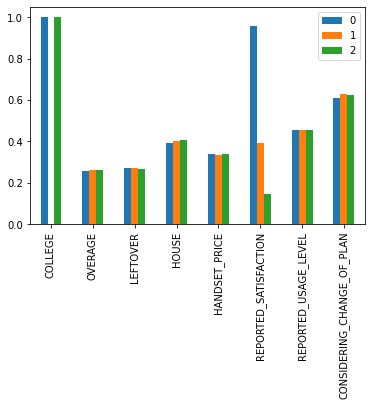

In [191]:
kmeans2=KMeans(n_clusters=3, init='k-means++', max_iter= 300, n_init= 10, random_state= 1 ).fit(X)
label = kmeans2.labels_
clus0_mean = X[label==0].mean()
clus1_mean = X[label==1].mean()
clus2_mean = X[label==2].mean()

clusters_mean=pd.concat([clus0_mean,clus1_mean,clus2_mean],axis=1)
clusters_mean.plot.bar()
clusters_mean

,0,1,2,3
COLLEGE,1.000000,0.000000,1.000000,0.000000
OVERAGE,0.255442,0.254131,0.262409,0.266332
LEFTOVER,0.270315,0.268779,0.266043,0.270253
HOUSE,0.394230,0.409972,0.407788,0.400192
HANDSET_PRICE,0.338821,0.340596,0.341028,0.331479
REPORTED_SATISFACTION,0.957383,0.878152,0.144592,0.107947
REPORTED_USAGE_LEVEL,0.456079,0.403098,0.452615,0.483225
CONSIDERING_CHANGE_OF_PLAN,0.611392,0.629523,0.623209,0.626229


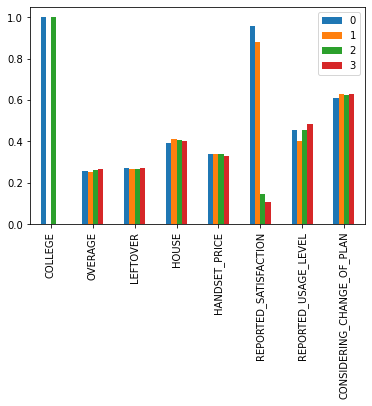

In [192]:
kmeans2=KMeans(n_clusters=4, init='k-means++', max_iter= 300, n_init= 10, random_state= 1 ).fit(X)
label = kmeans2.labels_
clus0_mean = X[label==0].mean()
clus1_mean = X[label==1].mean()
clus2_mean = X[label==2].mean()
clus3_mean = X[label==3].mean()
clusters_mean=pd.concat([clus0_mean,clus1_mean,clus2_mean,clus3_mean],axis=1)
clusters_mean.plot.bar()
clusters_mean

,0,1,2,3,4
COLLEGE,1.000000,0.000000,1.000000,1.000000,0.000000
OVERAGE,0.259806,0.264943,0.253858,0.264831,0.254746
LEFTOVER,0.261873,0.270229,0.271711,0.267630,0.268521
HOUSE,0.404838,0.401892,0.394297,0.409176,0.408125
HANDSET_PRICE,0.334665,0.332404,0.340232,0.343746,0.340396
REPORTED_SATISFACTION,0.181783,0.143979,0.960575,0.137914,0.958306
REPORTED_USAGE_LEVEL,0.934089,0.455236,0.432162,0.188450,0.450664
CONSIDERING_CHANGE_OF_PLAN,0.619331,0.627161,0.609533,0.626453,0.628073


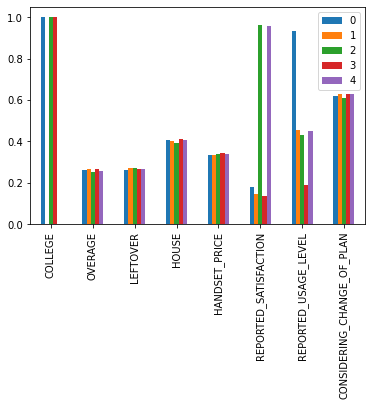

In [193]:
kmeans2=KMeans(n_clusters=5, init='k-means++', max_iter= 300, n_init= 10, random_state= 1 ).fit(X)
label = kmeans2.labels_
clus0_mean = X[label==0].mean()
clus1_mean = X[label==1].mean()
clus2_mean = X[label==2].mean()
clus3_mean = X[label==3].mean()
clus4_mean = X[label==4].mean()
clusters_mean=pd.concat([clus0_mean,clus1_mean,clus2_mean,clus3_mean,clus4_mean],axis=1)
clusters_mean.plot.bar()
clusters_mean

In [194]:
df.shape

(20000, 9)

,0,1,2,3,4,5
COLLEGE,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
OVERAGE,0.262741,0.266259,0.253615,0.264922,0.260287,0.254781
LEFTOVER,0.268022,0.271160,0.271054,0.267668,0.262104,0.268997
HOUSE,0.404425,0.400746,0.394050,0.408699,0.406599,0.407631
HANDSET_PRICE,0.323437,0.337120,0.339615,0.343806,0.335047,0.340768
REPORTED_SATISFACTION,0.141492,0.141910,0.950884,0.137427,0.151901,0.951851
REPORTED_USAGE_LEVEL,0.929807,0.187458,0.456029,0.188032,0.930623,0.451359
CONSIDERING_CHANGE_OF_PLAN,0.624095,0.629957,0.610691,0.626176,0.618932,0.626515


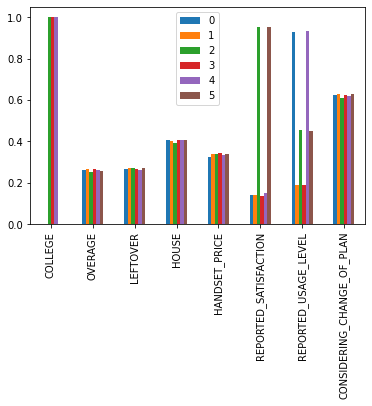

In [195]:
kmeans2=KMeans(n_clusters=6, init='k-means++', max_iter= 300, n_init= 10, random_state= 1 ).fit(X)
label = kmeans2.labels_
clus0_mean = X[label==0].mean()
clus1_mean = X[label==1].mean()
clus2_mean = X[label==2].mean()
clus3_mean = X[label==3].mean()
clus4_mean = X[label==4].mean()
clus5_mean = X[label==5].mean()
clusters_mean=pd.concat([clus0_mean,clus1_mean,clus2_mean,clus3_mean,clus4_mean,clus5_mean],axis=1)
clusters_mean.plot.bar()
clusters_mean

## **Prediction**

In [196]:
from tensorflow import keras
import tensorflow as tf
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import itertools
kl = keras.layers

In [197]:
#Train-test spilit
X,y = df1.loc[:, df1.columns != 'LEAVE'], df1.loc[:, df1.columns == 'LEAVE']
y1 = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.20, random_state=1)
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.25, random_state=1)


In [198]:
#build the model
def build_model(feature_size, n_classes):
    """ Build a small model for multi-label classification """
    inp = kl.Input((feature_size,))
    x = kl.Dense(20, activation='relu')(inp)
    x=kl.Dropout(0.2)(x)
    x = kl.Dense(10, activation='relu')(x)
    x=kl.Dropout(0.2)(x)
    out = kl.Dense(n_classes, activation='sigmoid')(x)
    model = keras.Model(inputs=inp, outputs=out)
    model.summary()
    return model

In [199]:
# plot confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1),2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [200]:
def show_model(model):
    plot_model(model, show_shapes=True, show_layer_names=True)

    

In [201]:
model = build_model(feature_size=11, n_classes=2)


Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 11)]              0         
_________________________________________________________________
dense_6 (Dense)              (None, 20)                240       
_________________________________________________________________
dropout_4 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                210       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 22        
Total params: 472
Trainable params: 472
Non-trainable params: 0
________________________________________________________

In [202]:
show_model(model)

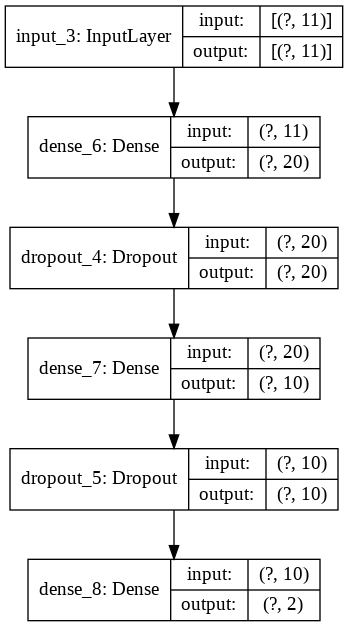

In [203]:
plot_model(model, show_shapes=True, show_layer_names=True)

Epoch 1/100
750/750 [==============================] - 1s 1ms/step - loss: 0.6775 - categorical_accuracy: 0.5739 - val_loss: 0.6537 - val_categorical_accuracy: 0.6168
Epoch 2/100
750/750 [==============================] - 1s 1ms/step - loss: 0.6495 - categorical_accuracy: 0.6274 - val_loss: 0.6395 - val_categorical_accuracy: 0.6360
Epoch 3/100
750/750 [==============================] - 1s 1ms/step - loss: 0.6386 - categorical_accuracy: 0.6406 - val_loss: 0.6379 - val_categorical_accuracy: 0.6335
Epoch 4/100
750/750 [==============================] - 1s 1ms/step - loss: 0.6340 - categorical_accuracy: 0.6428 - val_loss: 0.6274 - val_categorical_accuracy: 0.6472
Epoch 5/100
750/750 [==============================] - 1s 1ms/step - loss: 0.6319 - categorical_accuracy: 0.6476 - val_loss: 0.6235 - val_categorical_accuracy: 0.6497
Epoch 6/100
750/750 [==============================] - 1s 1ms/step - loss: 0.6279 - categorical_accuracy: 0.6539 - val_loss: 0.6231 - val_categorical_accuracy: 0.650

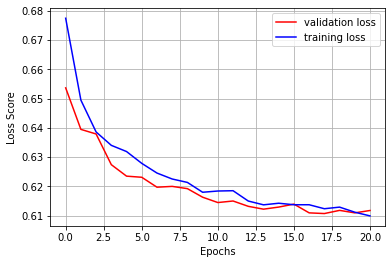

In [204]:
# train model

opt = tf.keras.optimizers.Adam(lr= 0.001 )
criterion = tf.keras.losses.categorical_crossentropy
model.compile(optimizer=opt, loss=criterion,metrics=[keras.metrics.categorical_accuracy])
model_early_stopping=EarlyStopping(monitor='val_loss', min_delta=.005, patience=10, verbose=1)# early stopping settings
model.fit(X_train, y_train,batch_size = 16,epochs=100, validation_data = (X_val, y_val),callbacks=[model_early_stopping])

fig = plt.figure()
plt.plot(model.history.history['val_loss'], 'r', model.history.history['loss'], 'b')
plt.legend(['validation loss','training loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss Score')
plt.grid(1)
plt.savefig('training_loss.jpg',dpi=300)

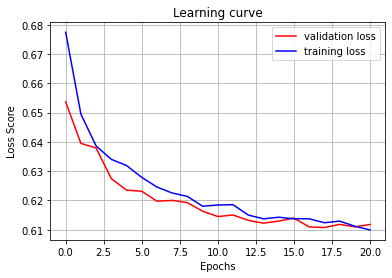

In [205]:
fig = plt.figure()
plt.plot(model.history.history['val_loss'], 'r', model.history.history['loss'], 'b')
plt.legend(['validation loss','training loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss Score')
plt.grid(1)
plt.title("Learning curve")
plt.savefig('training_loss.jpg',dpi=300)

[[1305  750]
 [ 563 1382]]
Confusion matrix, without normalization
[[1305  750]
 [ 563 1382]]
125/125 [==============================] - 0s 1ms/step - loss: 0.6114 - categorical_accuracy: 0.6718
[0.6113622188568115, 0.671750009059906]


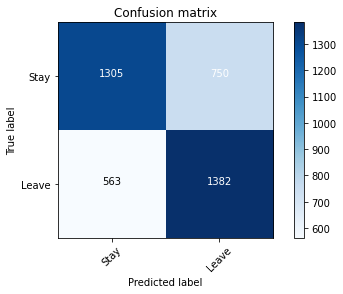

In [206]:
Y_Score=model.predict(X_test)
y_pred = np.argmax(Y_Score, axis=1)
cm=confusion_matrix(np.argmax(y_test, axis=1),y_pred)
print(cm)

fig = plt.figure()
plot_confusion_matrix(cm,classes=["Stay",'Leave'])
plt.savefig('conf_matrix.jpg',dpi=300)

test_loss=model.evaluate(X_test,y_test,verbose=1)#evaluate model
print(test_loss)#print test loss and metrics information

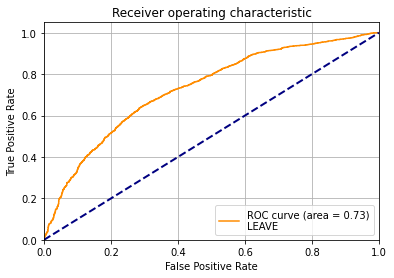

In [207]:
pos_label=0
fpr, tpr, thresholds = roc_curve(np.argmax(y_test, axis=1), Y_Score[:,pos_label], pos_label=pos_label)
roc_auc = auc(fpr, tpr)# calculate auc value
fig = plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)\nLEAVE' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.grid(1)
plt.legend(loc="lower right")
plt.savefig('roc_covid.jpg',dpi=300)

In [208]:
#Train-test spilit
X,y = df1.loc[:, df1.columns != 'LEAVE'], df1.loc[:, df1.columns == 'LEAVE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)


In [209]:
# Classification using RBF SVM  
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss, mean_squared_error as mse
from sklearn.utils.fixes import loguniform
{'C': loguniform(1e0, 1e3),
 'gamma': loguniform(1e-4, 1e-3),
 'kernel': ['rbf'],
 'class_weight':['balanced', None]}
classifier = SVC(kernel="rbf")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy with SVM RBF:",accuracy_score(y_test, y_pred))


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy with SVM RBF: 0.6775


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin


Average accuracy value:0.67425

Average precision values:0.6837746434278957

Average recall values:0.6302275893862015

Average Fscore values:0.6558885446447561
Normalized confusion matrix
[[0.72 0.29]
 [0.36 0.63]]


<Figure size 1440x1440 with 0 Axes>

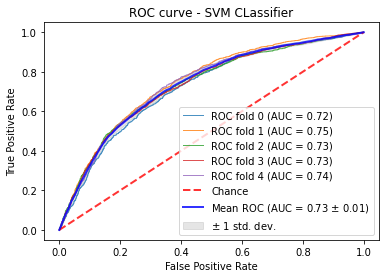

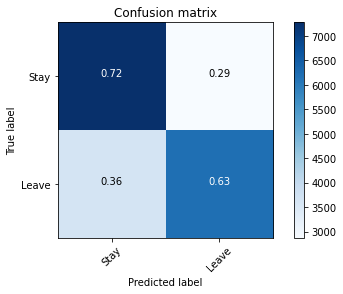

In [210]:
from sklearn.metrics import auc,accuracy_score,plot_roc_curve,precision_recall_fscore_support

from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
 
X,y = df1.loc[:, df1.columns != 'LEAVE'], df1.loc[:, df1.columns == 'LEAVE']
X=X.to_numpy()
y=y.to_numpy()
 #Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
classifier = SVC(kernel="rbf")

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
acc_list,precision_list,recall_list,Fscore_list,y_pred_list,y_true_list=[],[],[],[],[],[]
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.8, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    y_predict= classifier.predict(X[test])
    y_pred_list.extend(y_predict)
    y_true_list.extend(y[test])
    acc_list.append(accuracy_score(y[test],y_predict))
    metrics=precision_recall_fscore_support(y[test],y_predict, beta=1.0,
                                                    labels=None, pos_label=1, average=None, 
                                                    warn_for=('precision', 'recall', 'f-score'),
                                                    sample_weight=None, zero_division='warn')
    precision_list.append(metrics[0][1])
    recall_list.append(metrics[1][1])
    Fscore_list.append(metrics[2][1])
    if i:
      X_test=np.concatenate((X_test,X[test]),axis=0)
      X_test_label_0=np.concatenate((X_test_label_0,X[test][y_predict==0,:]),axis=0)
      X_test_label_1=np.concatenate((X_test_label_1,X[test][y_predict==1,:]),axis=0)
    else:
      X_test=X[test]
      X_test_label_0=X[test][y_predict==0,:]
      X_test_label_1=X[test][y_predict==1,:]


print('\nAverage accuracy value:'+str(np.mean(acc_list))) 
print('\nAverage precision values:'+str(np.mean(precision_list))) 
print('\nAverage recall values:'+str(np.mean(recall_list))) 
print('\nAverage Fscore values:'+str(np.mean(Fscore_list))) 

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC curve - SVM CLassifier")
ax.legend(loc="lower right")
plt.figure()
cm=confusion_matrix(y_true_list,y_pred_list)
plot_confusion_matrix(cm,classes=["Stay",'Leave'],normalize=True)
plt.show()

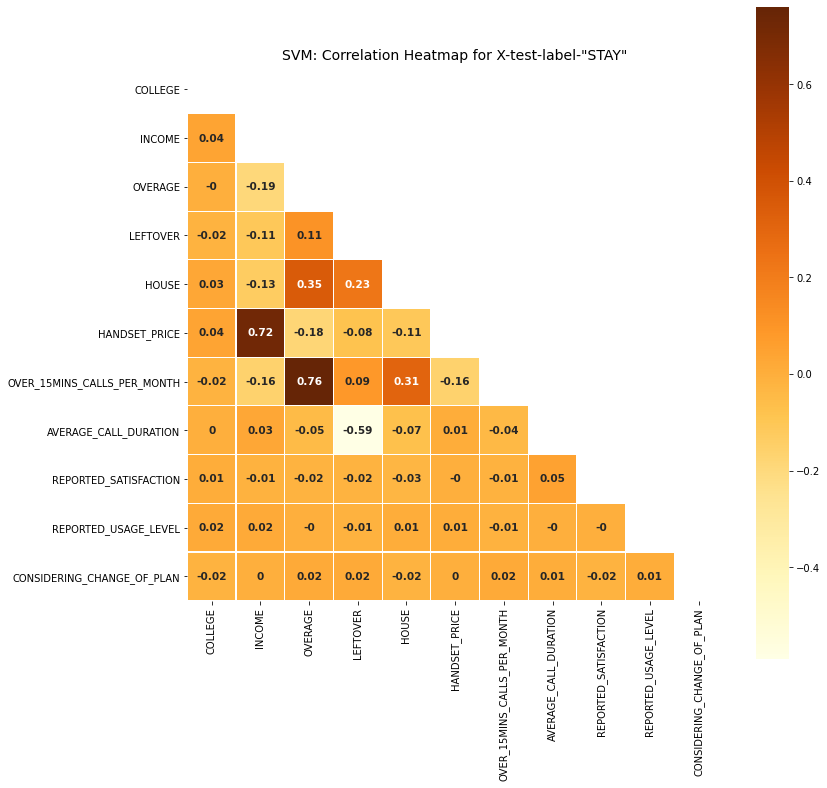

In [211]:
df = pd.DataFrame(data=X_test_label_0, columns=["COLLEGE", "INCOME", "OVERAGE", "LEFTOVER", "HOUSE", "HANDSET_PRICE", "OVER_15MINS_CALLS_PER_MONTH", "AVERAGE_CALL_DURATION",
                                                "REPORTED_SATISFACTION", "REPORTED_USAGE_LEVEL", "CONSIDERING_CHANGE_OF_PLAN"])
var_corr = round(df.corr(),2)
Generate_heatmap_graph(var_corr
                       ,chart_title = 'SVM: Correlation Heatmap for X-test-label-"STAY"'
                       ,mask_uppertri = True)


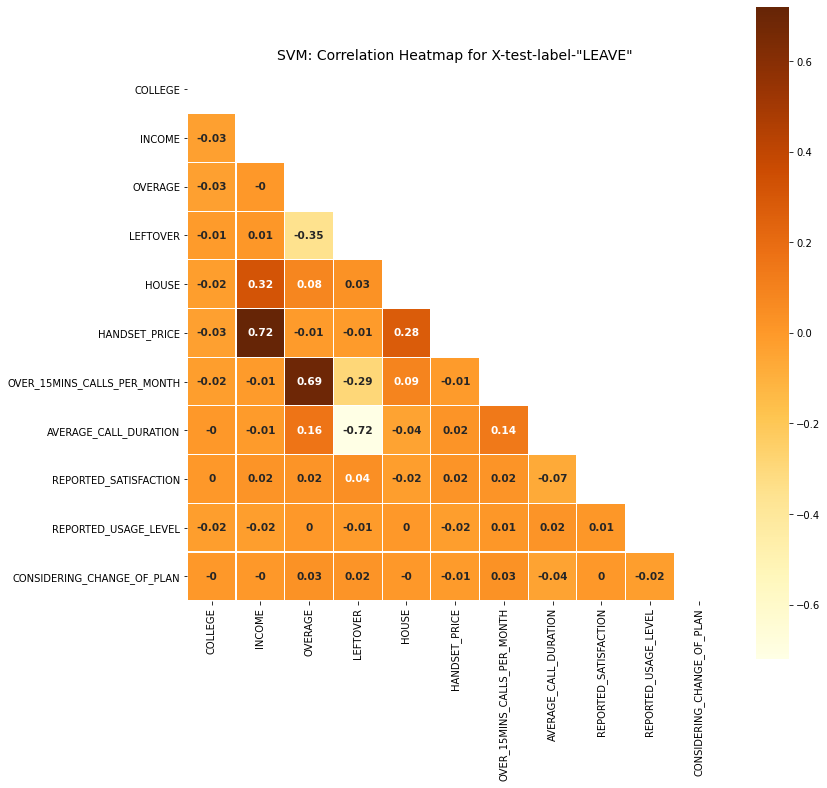

In [212]:
df = pd.DataFrame(data=X_test_label_1, columns=["COLLEGE", "INCOME", "OVERAGE", "LEFTOVER", "HOUSE", "HANDSET_PRICE", "OVER_15MINS_CALLS_PER_MONTH", "AVERAGE_CALL_DURATION",
                                                "REPORTED_SATISFACTION", "REPORTED_USAGE_LEVEL", "CONSIDERING_CHANGE_OF_PLAN"])
var_corr = round(df.corr(),2)
Generate_heatmap_graph(var_corr
                       ,chart_title = 'SVM: Correlation Heatmap for X-test-label-"LEAVE"'
                       ,mask_uppertri = True)


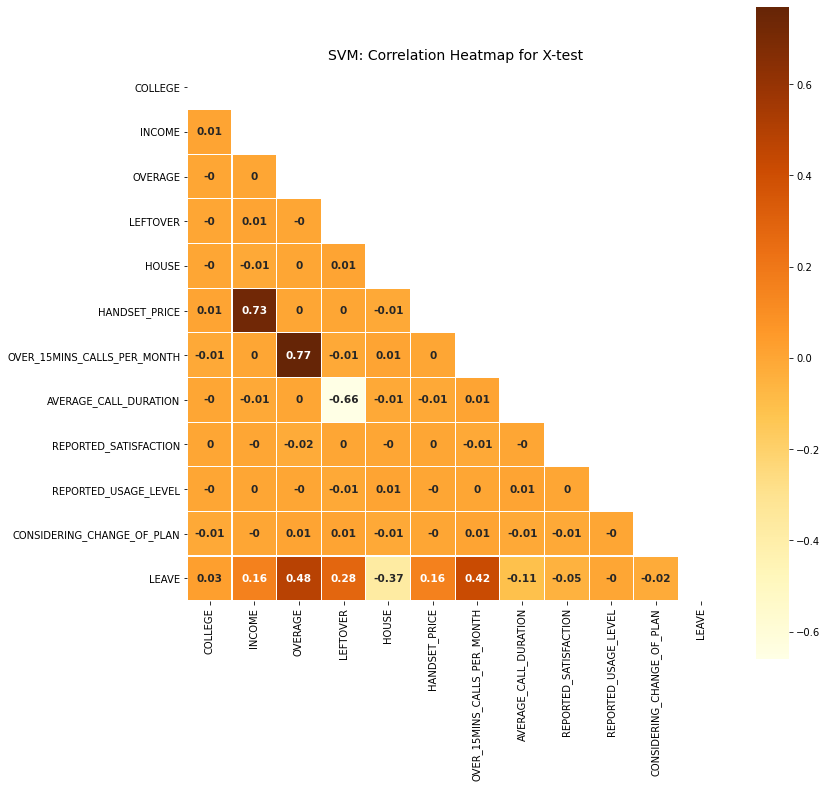

In [213]:
y_preds=np.array(y_pred_list).reshape(-1,1)
#y_preds=y_preds[y_preds==1].reshape(-1,1)
df = pd.DataFrame(data=np.concatenate((X_test,y_preds),axis=1), columns=["COLLEGE", "INCOME", "OVERAGE", "LEFTOVER", "HOUSE", "HANDSET_PRICE", "OVER_15MINS_CALLS_PER_MONTH", "AVERAGE_CALL_DURATION",
                                                "REPORTED_SATISFACTION", "REPORTED_USAGE_LEVEL", "CONSIDERING_CHANGE_OF_PLAN","LEAVE"])
var_corr = round(df.corr(),2)
Generate_heatmap_graph(var_corr
                       ,chart_title = 'SVM: Correlation Heatmap for X-test'
                       ,mask_uppertri = True)

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress thi


Average accuracy value:0.7021

Average precision values:
0.6688157423579044

Average recall values:
0.7830897248684607

Average Fscore values:
0.721418501264853
Normalized confusion matrix
[[0.62 0.39]
 [0.21 0.78]]


/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


<Figure size 1440x1440 with 0 Axes>

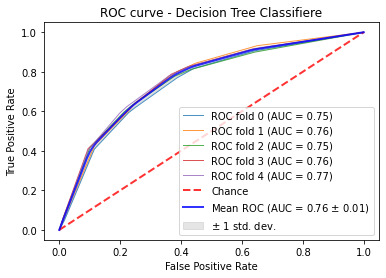

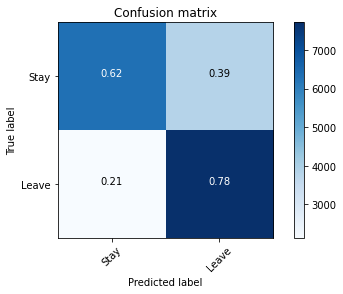

In [214]:
from sklearn.metrics import auc,accuracy_score,plot_roc_curve

from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
 
X,y = df1.loc[:, df1.columns != 'LEAVE'], df1.loc[:, df1.columns == 'LEAVE']
X=X.to_numpy()
y=y.to_numpy()
 #Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
classifier= DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=4, max_features=None,
                              max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=2,
                              min_weight_fraction_leaf=0.0,presort=False, random_state=100, splitter='best')

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
acc_list,precision_list,recall_list,Fscore_list,y_pred_list,y_true_list=[],[],[],[],[],[]
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.8, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    y_predict= classifier.predict(X[test])
    y_pred_list.extend(y_predict)
    y_true_list.extend(y[test])
    acc_list.append(accuracy_score(y[test],y_predict))
    metrics=precision_recall_fscore_support(y[test],y_predict, beta=1.0,
                                                    labels=None, pos_label=1, average=None, 
                                                    warn_for=('precision', 'recall', 'f-score'),
                                                    sample_weight=None, zero_division='warn')
    precision_list.append(metrics[0][1])
    recall_list.append(metrics[1][1])
    Fscore_list.append(metrics[2][1])
    if i:
      X_test=np.concatenate((X_test,X[test]),axis=0)
      X_test_label_0=np.concatenate((X_test_label_0,X[test][y_predict==0,:]),axis=0)
      X_test_label_1=np.concatenate((X_test_label_1,X[test][y_predict==1,:]),axis=0)
    else:
      X_test=X[test]
      X_test_label_0=X[test][y_predict==0,:]
      X_test_label_1=X[test][y_predict==1,:]


print('\nAverage accuracy value:'+str(np.mean(acc_list))) 
print('\nAverage precision values:\n'+str(np.mean(precision_list))) 
print('\nAverage recall values:\n'+str(np.mean(recall_list))) 
print('\nAverage Fscore values:\n'+str(np.mean(Fscore_list))) 

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC curve - Decision Tree Classifiere")
ax.legend(loc="lower right")
plt.figure()
cm=confusion_matrix(y_true_list,y_pred_list)
plot_confusion_matrix(cm,classes=["Stay",'Leave'],normalize=True)
plt.show()



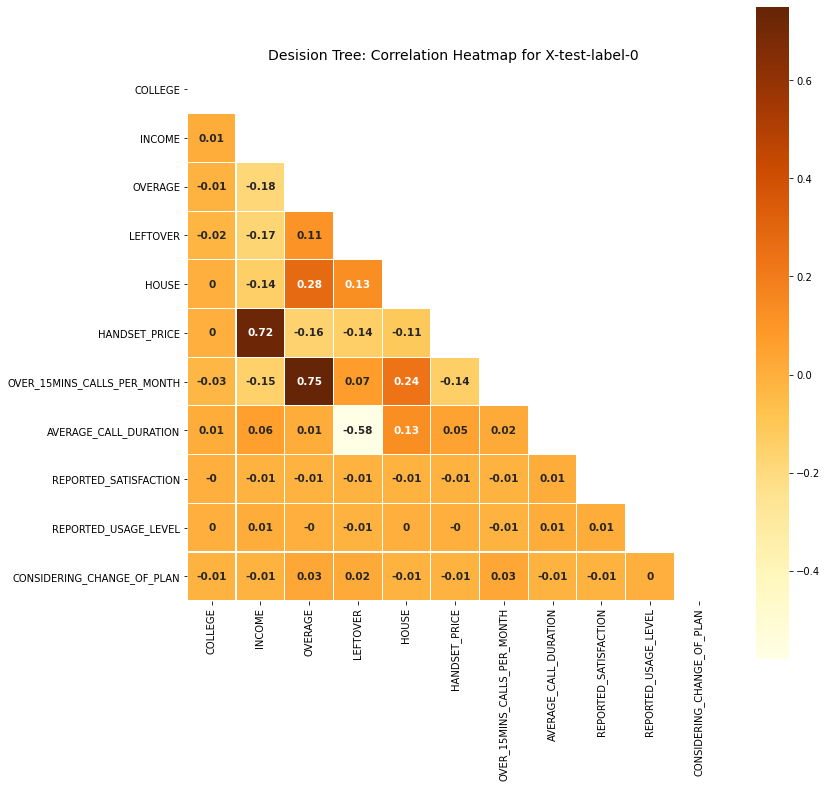

In [215]:

df = pd.DataFrame(data=X_test_label_0, columns=["COLLEGE", "INCOME", "OVERAGE", "LEFTOVER", "HOUSE", "HANDSET_PRICE", "OVER_15MINS_CALLS_PER_MONTH", "AVERAGE_CALL_DURATION",
                                                "REPORTED_SATISFACTION", "REPORTED_USAGE_LEVEL", "CONSIDERING_CHANGE_OF_PLAN"])
var_corr = round(df.corr(),2)
Generate_heatmap_graph(var_corr
                       ,chart_title = 'Desision Tree: Correlation Heatmap for X-test-label-0 '
                       ,mask_uppertri = True)


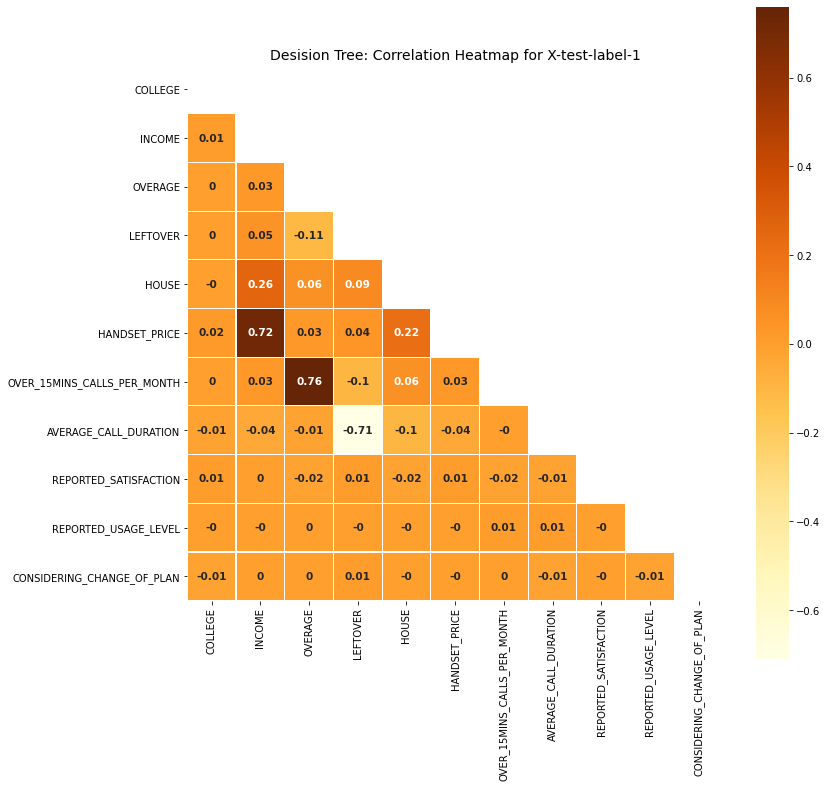

In [216]:

df = pd.DataFrame(data=X_test_label_1, columns=["COLLEGE", "INCOME", "OVERAGE", "LEFTOVER", "HOUSE", "HANDSET_PRICE", "OVER_15MINS_CALLS_PER_MONTH", "AVERAGE_CALL_DURATION",
                                                "REPORTED_SATISFACTION", "REPORTED_USAGE_LEVEL", "CONSIDERING_CHANGE_OF_PLAN"])
var_corr = round(df.corr(),2)
Generate_heatmap_graph(var_corr
                       ,chart_title = 'Desision Tree: Correlation Heatmap for X-test-label-1'
                       ,mask_uppertri = True)

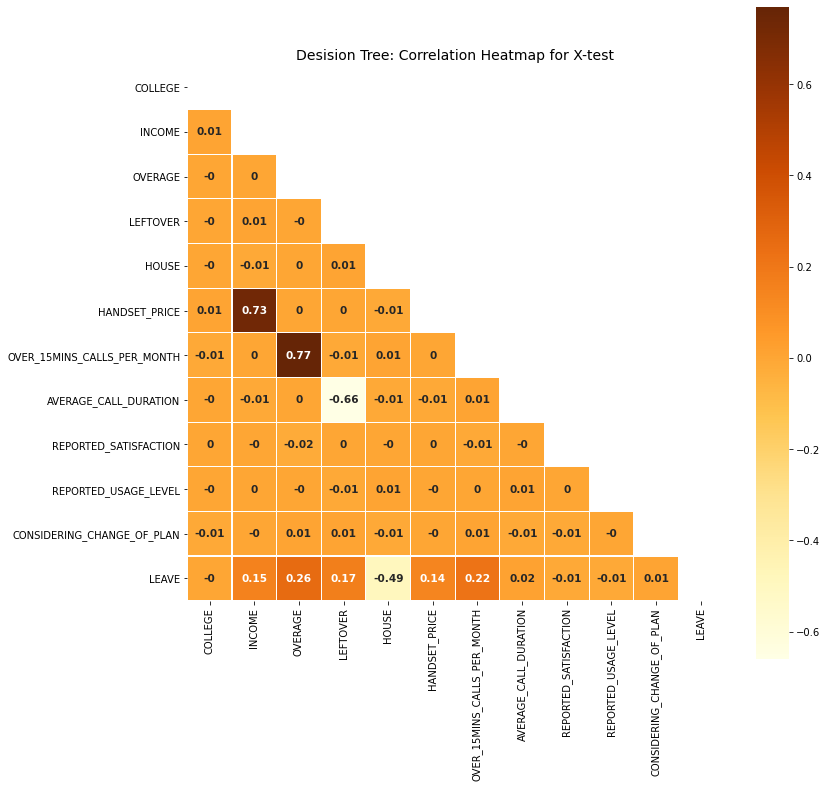

In [217]:
y_preds=np.array(y_pred_list).reshape(-1,1)
#y_preds=y_preds[y_preds==1].reshape(-1,1)
df = pd.DataFrame(data=np.concatenate((X_test,y_preds),axis=1), columns=["COLLEGE", "INCOME", "OVERAGE", "LEFTOVER", "HOUSE", "HANDSET_PRICE", "OVER_15MINS_CALLS_PER_MONTH", "AVERAGE_CALL_DURATION",
                                                "REPORTED_SATISFACTION", "REPORTED_USAGE_LEVEL", "CONSIDERING_CHANGE_OF_PLAN","LEAVE"])
var_corr = round(df.corr(),2)
Generate_heatmap_graph(var_corr
                       ,chart_title = 'Desision Tree: Correlation Heatmap for X-test'
                       ,mask_uppertri = True)